https://blog.keras.io/building-autoencoders-in-keras.html


In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_shape = (28, 28, 1)

input_img = keras.Input(shape=image_shape)

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

latent_shape = encoded.shape[1:]

print("latent shape:", latent_shape)

latent shape: (2, 2, 4)


In [3]:
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

assert decoded.shape[1:] == image_shape

In [4]:
input_latent = keras.Input(shape=latent_shape)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_latent)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded2 = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

assert decoded2.shape[1:] == image_shape


In [5]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [7]:
autoencoder.fit(
    x_train, x_train,
    epochs=300,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.3360 - val_loss: 0.1967
Epoch 2/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1897 - val_loss: 0.1723
Epoch 3/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1701 - val_loss: 0.1625
Epoch 4/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1600 - val_loss: 0.1541
Epoch 5/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1548 - val_loss: 0.1506
Epoch 6/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1511 - val_loss: 0.1474
Epoch 7/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1480 - val_loss: 0.1449
Epoch 8/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1457 - val_loss: 0.1429
Epoch 9/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1440 - val_loss: 0.1452
Epoch 10/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1426 - val_loss: 0.1397
Epoch 11/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1410 - val_loss: 0.1401
Epoch 12/300
469/469 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


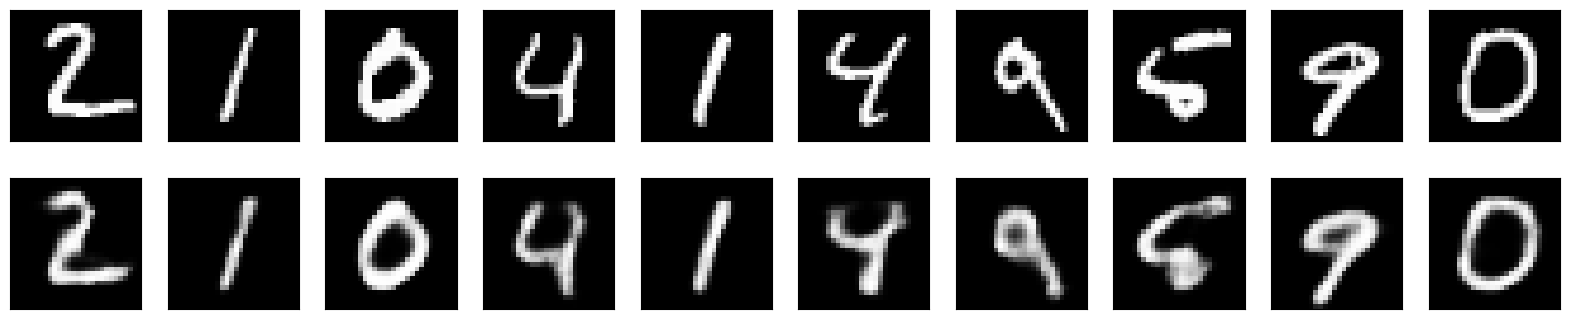

In [8]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


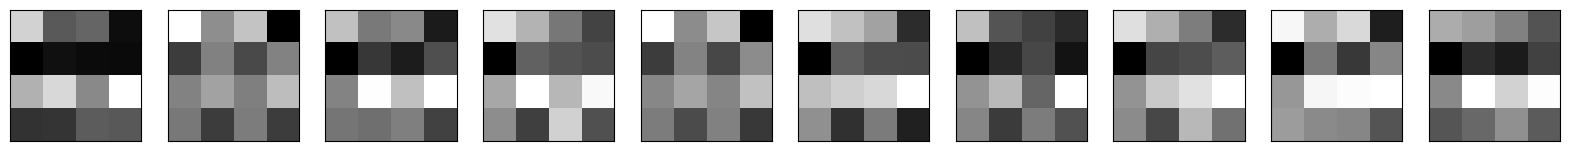

In [9]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Building Custom Decoder

In [10]:
decoder = keras.Model(input_latent, decoded2)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.inputs, decoder.outputs

([<KerasTensor shape=(None, 2, 2, 4), dtype=float32, sparse=None, name=keras_tensor_18>],
 [<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_27>])

In [11]:
model_weights = autoencoder.trainable_weights
target_model_weights = decoder.trainable_weights
len(model_weights), len(target_model_weights)

(18, 10)

In [12]:
di = len(model_weights) - len(target_model_weights)
for i in range(len(target_model_weights)):
    target_model_weights[i].assign(model_weights[i + di])


In [13]:
decoded_from_latent = decoder.predict(encoded_imgs)
decoded_from_latent.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 28, 28, 1)

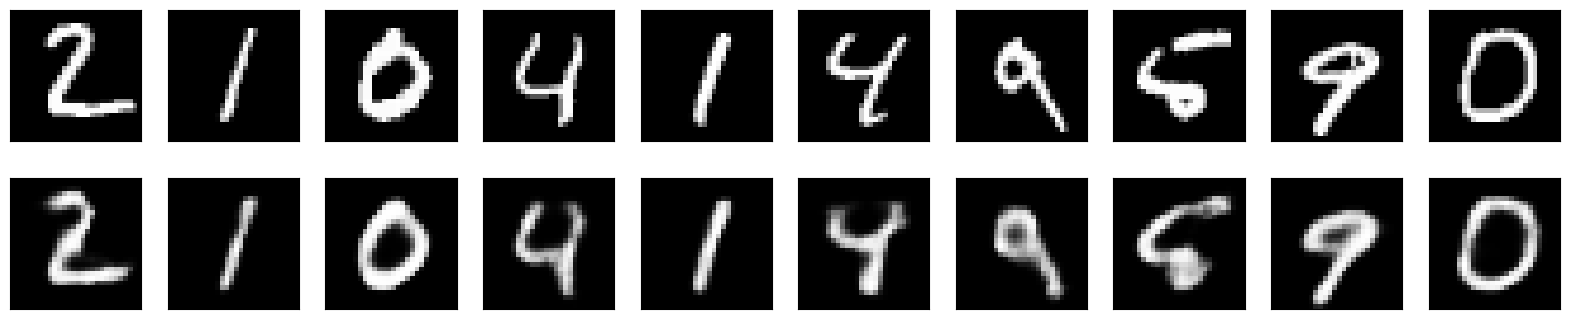

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_from_latent[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
encoded_imgs[2]

array([[[14.024089 ,  3.9681635,  7.5078783,  7.012121 ],
        [ 8.13956  ,  7.449371 ,  9.183737 ,  3.9159899]],

       [[10.920733 ,  4.5604177,  7.3611007,  7.201546 ],
        [ 0.7695223,  7.5243387, 10.582001 ,  3.8779607]]], dtype=float32)

# Trying to Randomize Latent Input

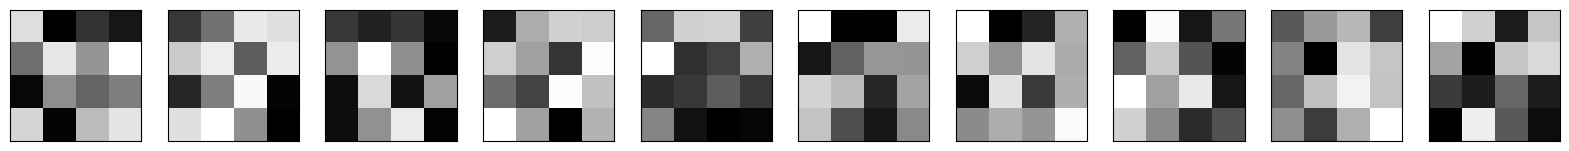

In [20]:
randlatent = np.random.random((10, *latent_shape)) * 15
# randlatent[:,:,:,[0]] = 4.0
# randlatent[:,:,:,[3]] = 0.0

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(randlatent[i-1].reshape((4, 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


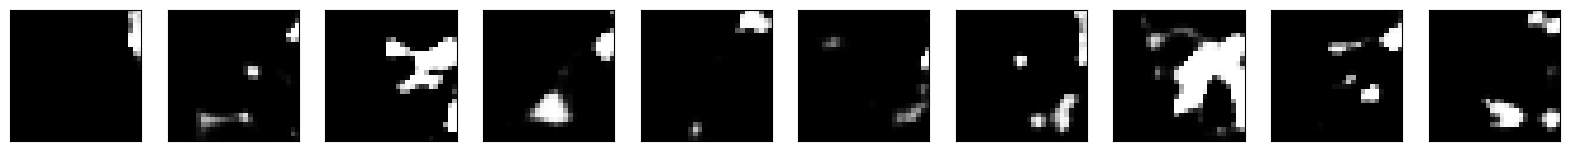

In [21]:
decoded_from_randlatent = decoder.predict(randlatent)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display reconstruction
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_from_randlatent[i-1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
import shutil
import os

if os.path.isdir("encoder-sm"):
    shutil.rmtree("encoder-sm")
encoder.export("encoder-sm")

if os.path.isdir("decoder-sm"):
    shutil.rmtree("decoder-sm")
decoder.export("decoder-sm")

INFO:tensorflow:Assets written to: encoder-sm\assets


INFO:tensorflow:Assets written to: encoder-sm\assets


Saved artifact at 'encoder-sm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2, 2, 4), dtype=tf.float32, name=None)
Captures:
  2785471947424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015632320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015631792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015633200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015630912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015632144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015631616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015633728: TensorSpec(shape=(), dtype=tf.resource, name=None)
INFO:tensorflow:Assets written to: decoder-sm\assets


INFO:tensorflow:Assets written to: decoder-sm\assets


Saved artifact at 'decoder-sm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2, 2, 4), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)
Captures:
  2786015637600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015638128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015636368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015638832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015638480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015639536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015638304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015639888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015639360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2786015640240: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [45]:
if os.path.isdir("encoder"):
    shutil.rmtree("encoder")
if os.path.isdir("decoder"):
    shutil.rmtree("decoder")

```
wsl
cd /mnt/c/dev/wslenv/
source venv/bin/activate
tensorflowjs_converter --output_format=tfjs_graph_model ../ai-demo/espace-latent/encoder-sm/ ../ai-demo/espace-latent/encoder
tensorflowjs_converter --output_format=tfjs_graph_model ../ai-demo/espace-latent/decoder-sm/ ../ai-demo/espace-latent/decoder
```

In [44]:
import random
import json

imgs_per_digits = {}
for i in range(len(x_train)):
    imgs_per_digits.setdefault(y_train[i], [])
    imgs_per_digits[y_train[i]].append(x_train[i])
digits = []
for digit in range(10):
    random.shuffle(imgs_per_digits[digit])
    digits += imgs_per_digits[digit][:10]

with open("digits.json", "w") as file:
    json.dump([x.tolist() for x in digits], file)

# Median / Average Digits

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━

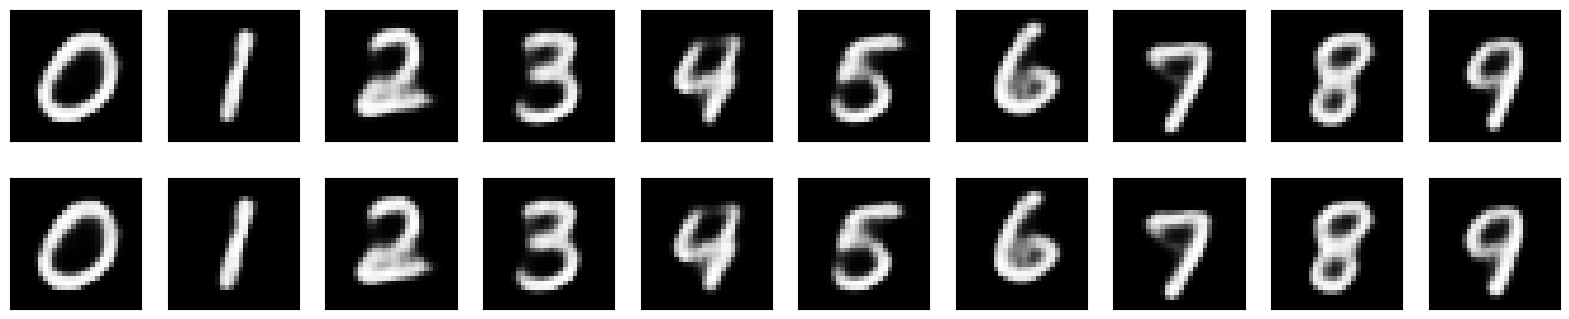

In [74]:
median_latent_vectors = []
plt.figure(figsize=(20, 4))
for digit in range(10):
    median_latent = np.median(encoder.predict(np.array(imgs_per_digits[digit])), axis=0)
    median_latent_vectors.append(median_latent)
    decoded_median_image = decoder.predict(median_latent.reshape((1, 2, 2, 4)))
    ax = plt.subplot(2, 10, digit + 1)
    plt.imshow(decoded_median_image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    average_latent = np.average(encoder.predict(np.array(imgs_per_digits[digit])), axis=0)
    decoded_average_image = decoder.predict(average_latent.reshape((1, 2, 2, 4)))
    ax = plt.subplot(2, 10, 10 + digit + 1)
    plt.imshow(decoded_average_image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [76]:
with open("median.json", "w") as file:
    json.dump([x.tolist() for x in median_latent_vectors], file)

186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


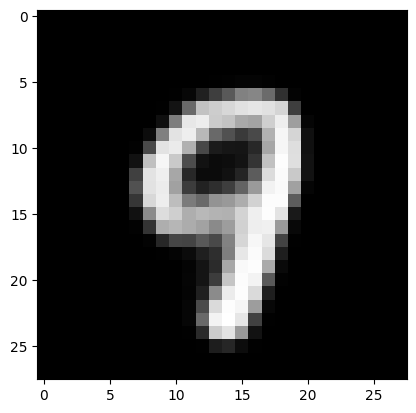

In [67]:
median_zero = np.average(encoder.predict(np.array(imgs_per_digits[9])), axis=0)
decoded_median_zero = decoder.predict(median_zero.reshape((1, 2, 2, 4)))
plt.imshow(decoded_median_zero.reshape(28, 28))